In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
from scipy import stats
from statistics import *
from sklearn.model_selection import *
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('creditcard.csv')
df.head(-5) ## printing first and last five rows of data frame, you could use df.tail() to print last five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


In [7]:
df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.shape

(284807, 31)

# Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Checking duplicated values

In [11]:
df.duplicated().sum()

1081

In [12]:
df.drop_duplicates(keep="first", inplace=True)

In [13]:
df.drop("Time",inplace=True,axis=1)

In [14]:
df.duplicated().sum()

8063

# Exploratory Data Analysis

## Univariate Analysis

In [15]:
df.shape

(283726, 30)

In [16]:
df[["Class"]].value_counts()

Class
0        283253
1           473
dtype: int64

In [17]:
good=df[df.Class==0]
bad= df[df.Class==1]

In [18]:
good.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
bad.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### By now we can observe the difference in mean amount of transaction which is fair and fraud

## Plots

<AxesSubplot:xlabel='Class', ylabel='count'>

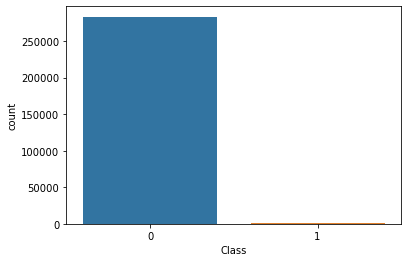

In [20]:
sns.countplot(x=df.Class)

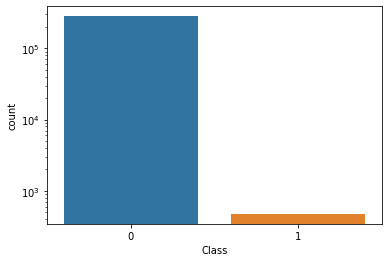

In [21]:
newplot=sns.countplot(x='Class',data=df);
newplot.set_yscale('log')

In [22]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x17300fc8d90>,
 [Text(-1.0999849139505065, 0.005760996554156921, 'fraud'),
  Text(1.099984914296047, -0.005760930577456522, 'fair')],
 [Text(-0.5999917712457308, 0.0031423617568128656, '99.83'),
  Text(0.5999917714342073, -0.003142325769521739, '0.17')])

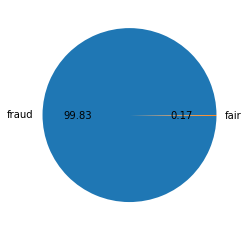

In [23]:
plt.pie(x=df.Class.value_counts(),labels=["fraud","fair"],autopct="%0.2f")

## histogram

In [24]:
num=df.drop(columns="Class").iloc[:,0:30]
cat=df.Class

In [25]:
X=df.drop(columns="Class")
Y=df.Class

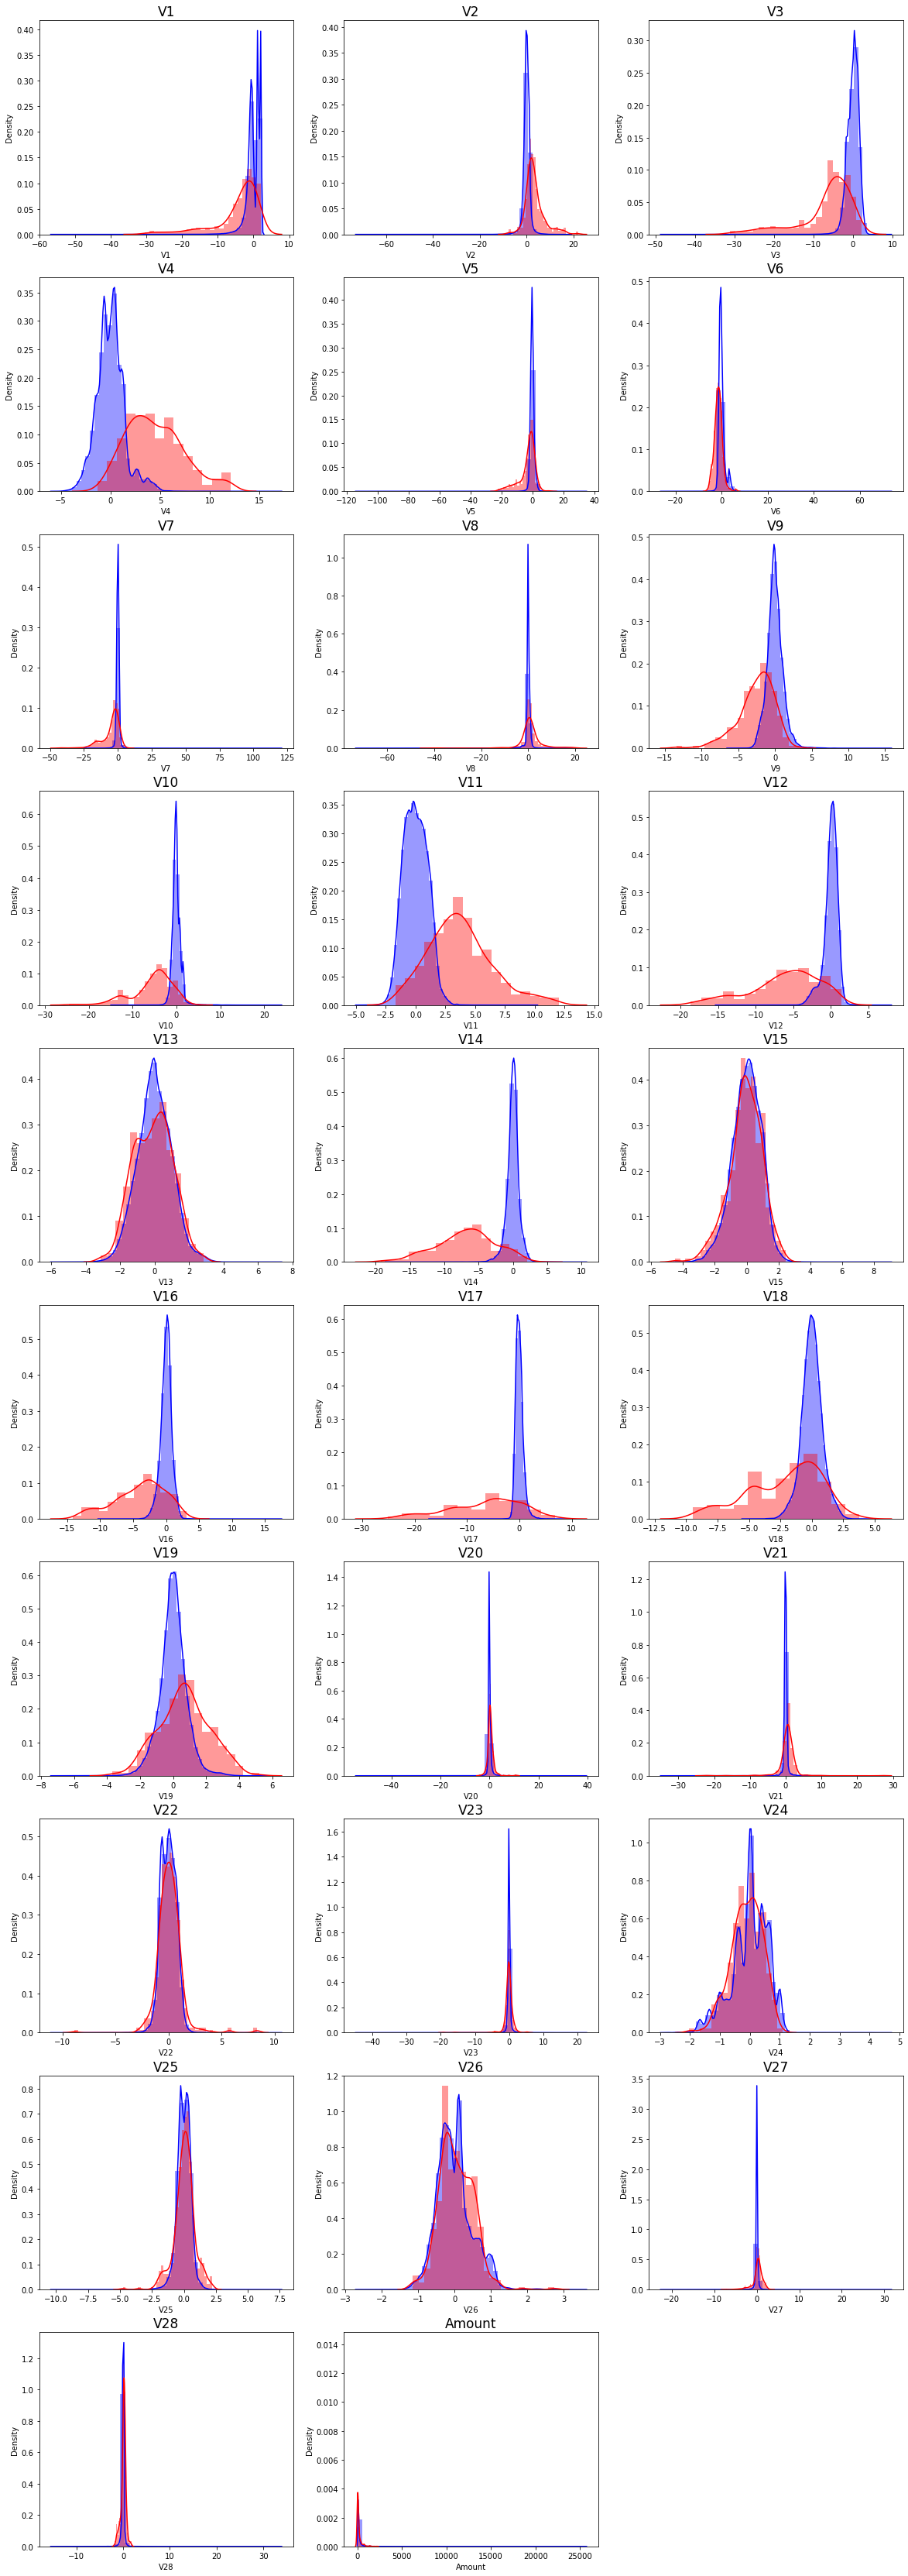

In [26]:
plt.figure(figsize=(20,60))
for i,col in enumerate(num):
    plt.subplot(10,3,i+1)
    sns.distplot(X[col][df.Class==0],color="blue")
    sns.distplot(X[col][df.Class==1],color="red")
    plt.title(col,fontsize=17)
plt.show()

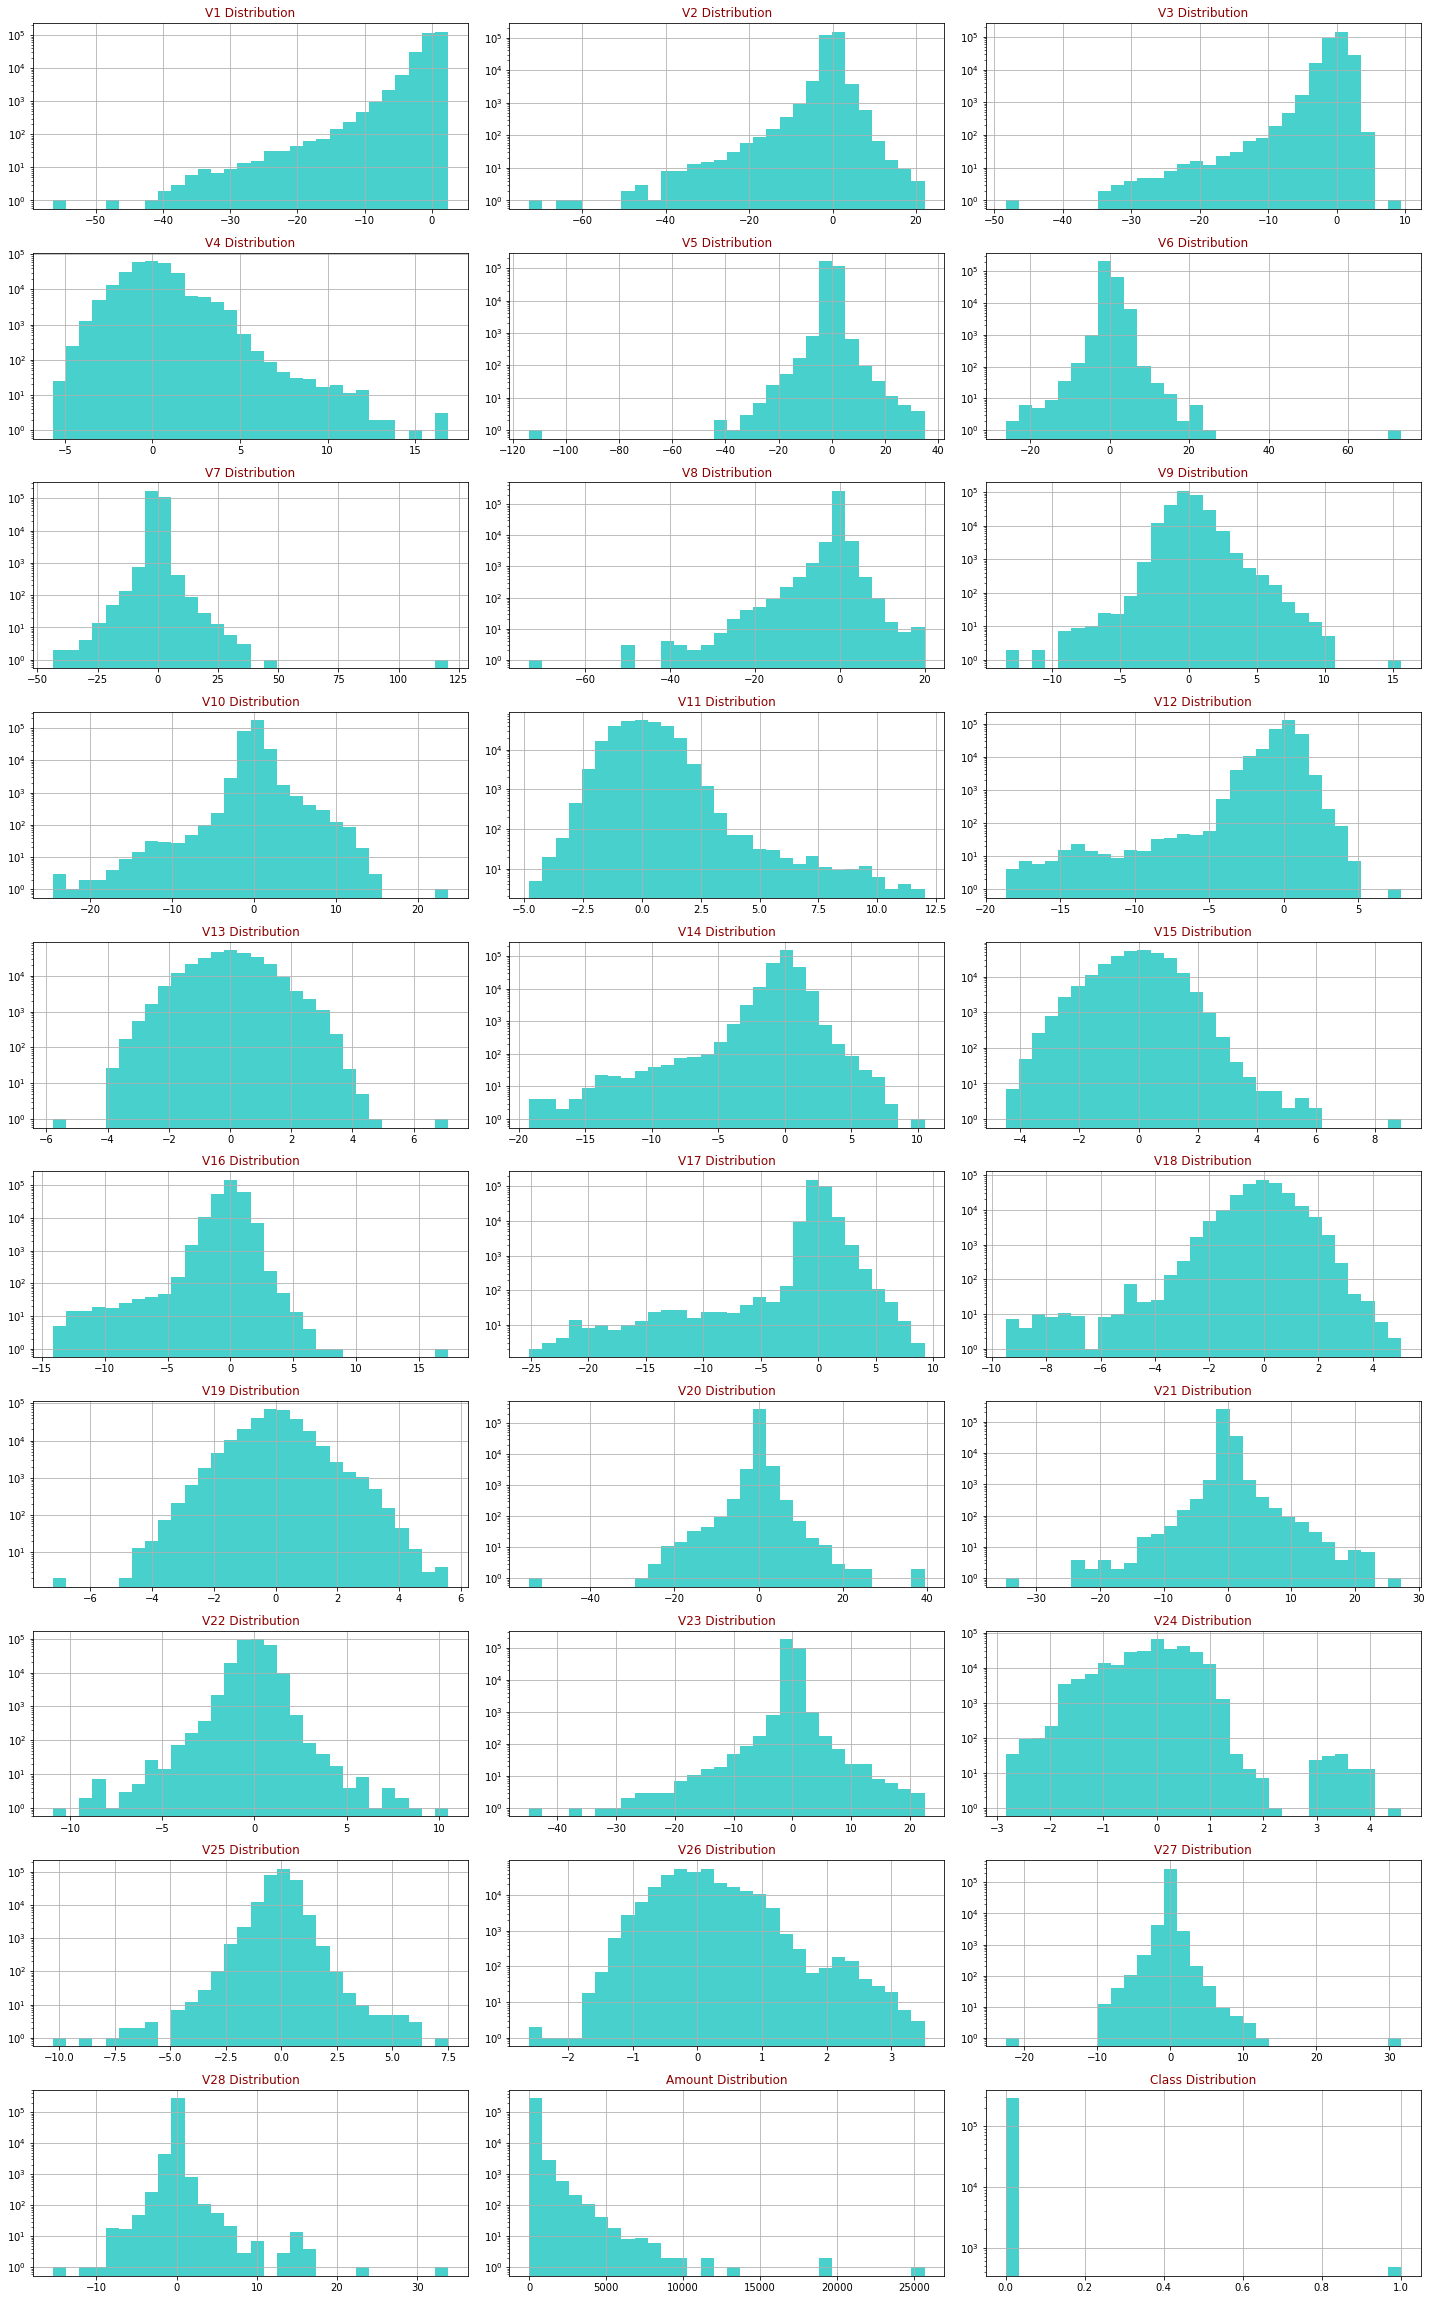

In [27]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,35))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=30,ax=ax,facecolor='mediumturquoise')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,11,3)

### Normality Check

In [28]:
from scipy.stats import *
skew=skew(df[num.columns])
for i in range(len(skew)):
    print(num.columns[i],"=",skew[i])

V1 = -3.273253943254153
V2 = -4.695137078242293
V3 = -2.151972579946695
V4 = 0.6715006205773218
V5 = -2.414066483550589
V6 = 1.8298707096390152
V7 = 2.8902559088252024
V8 = -8.310926391841976
V9 = 0.5376602109326033
V10 = 1.2529604545982167
V11 = 0.3440723742072897
V12 = -2.198996655834823
V13 = 0.06429306472750984
V14 = -1.9187935694600944
V15 = -0.309657445191733
V16 = -1.0511559142396787
V17 = -3.6904776832368715
V18 = -0.2486601427489995
V19 = 0.10831123831193233
V20 = -2.043110254104696
V21 = 2.820018204711808
V22 = -0.18232876403941115
V23 = -5.867189771699894
V24 = -0.5521263176785379
V25 = -0.4157416640561652
V26 = 0.5802892493449583
V27 = -0.7537999278912435
V28 = 11.555053993421962
Amount = 16.978713606543693


In [29]:
correlation=df.corr()
correlation

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021
V10,0.000815,0.000620,-0.009632,0.002753,-0.006050,-0.002180,-0.013617,0.000481,-0.012613,1.000000,...,0.003777,-0.000481,0.001917,0.000154,-0.000565,0.001089,0.010769,0.009159,-0.102255,-0.206971


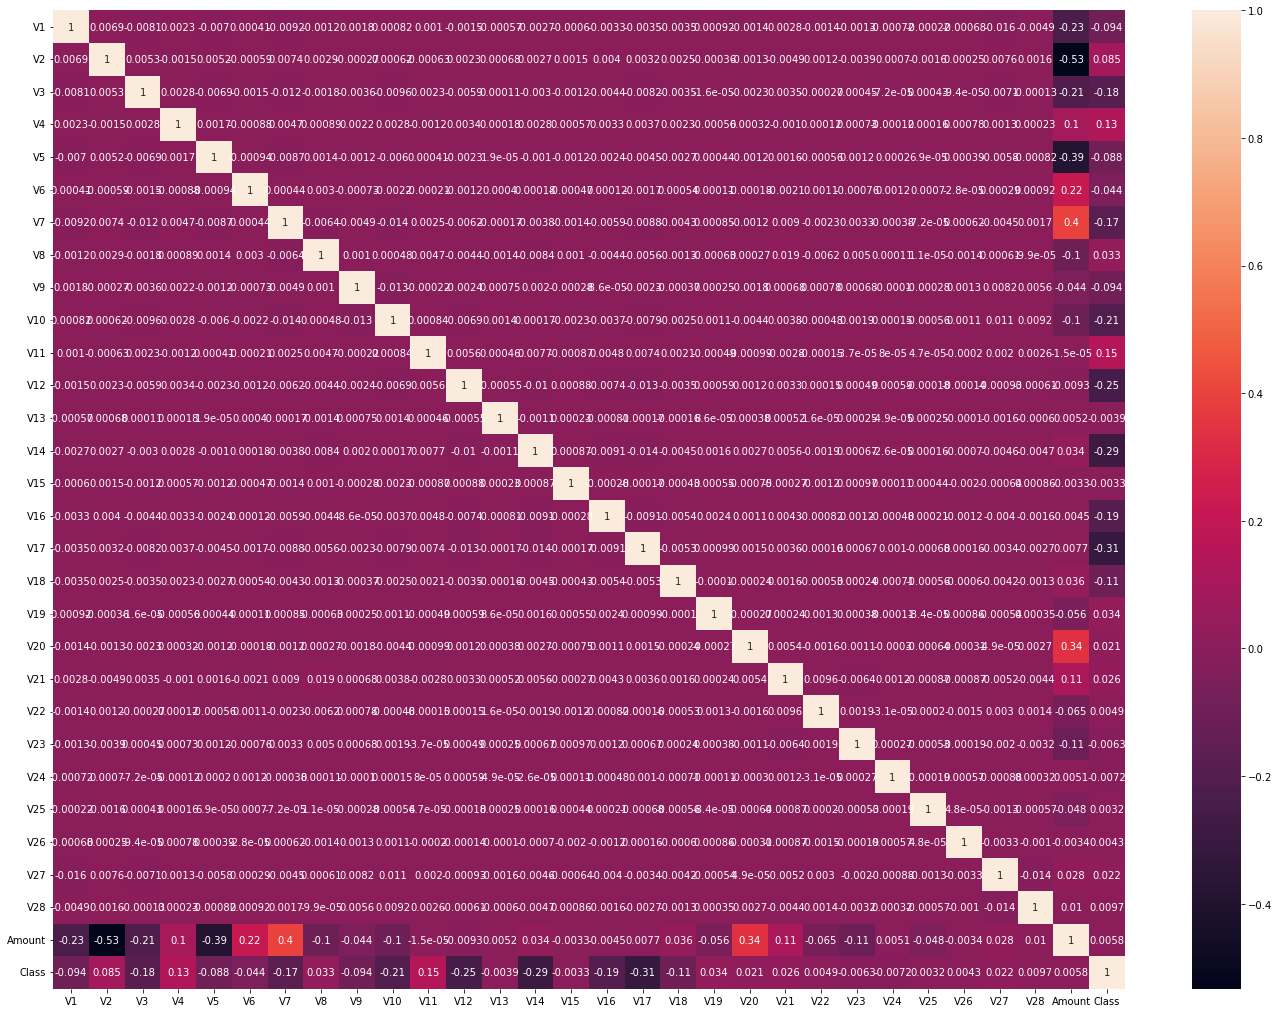

In [30]:
plt.figure(figsize=(24,18))
sns.heatmap(correlation,annot=True)
plt.show()

### Outlier Detection

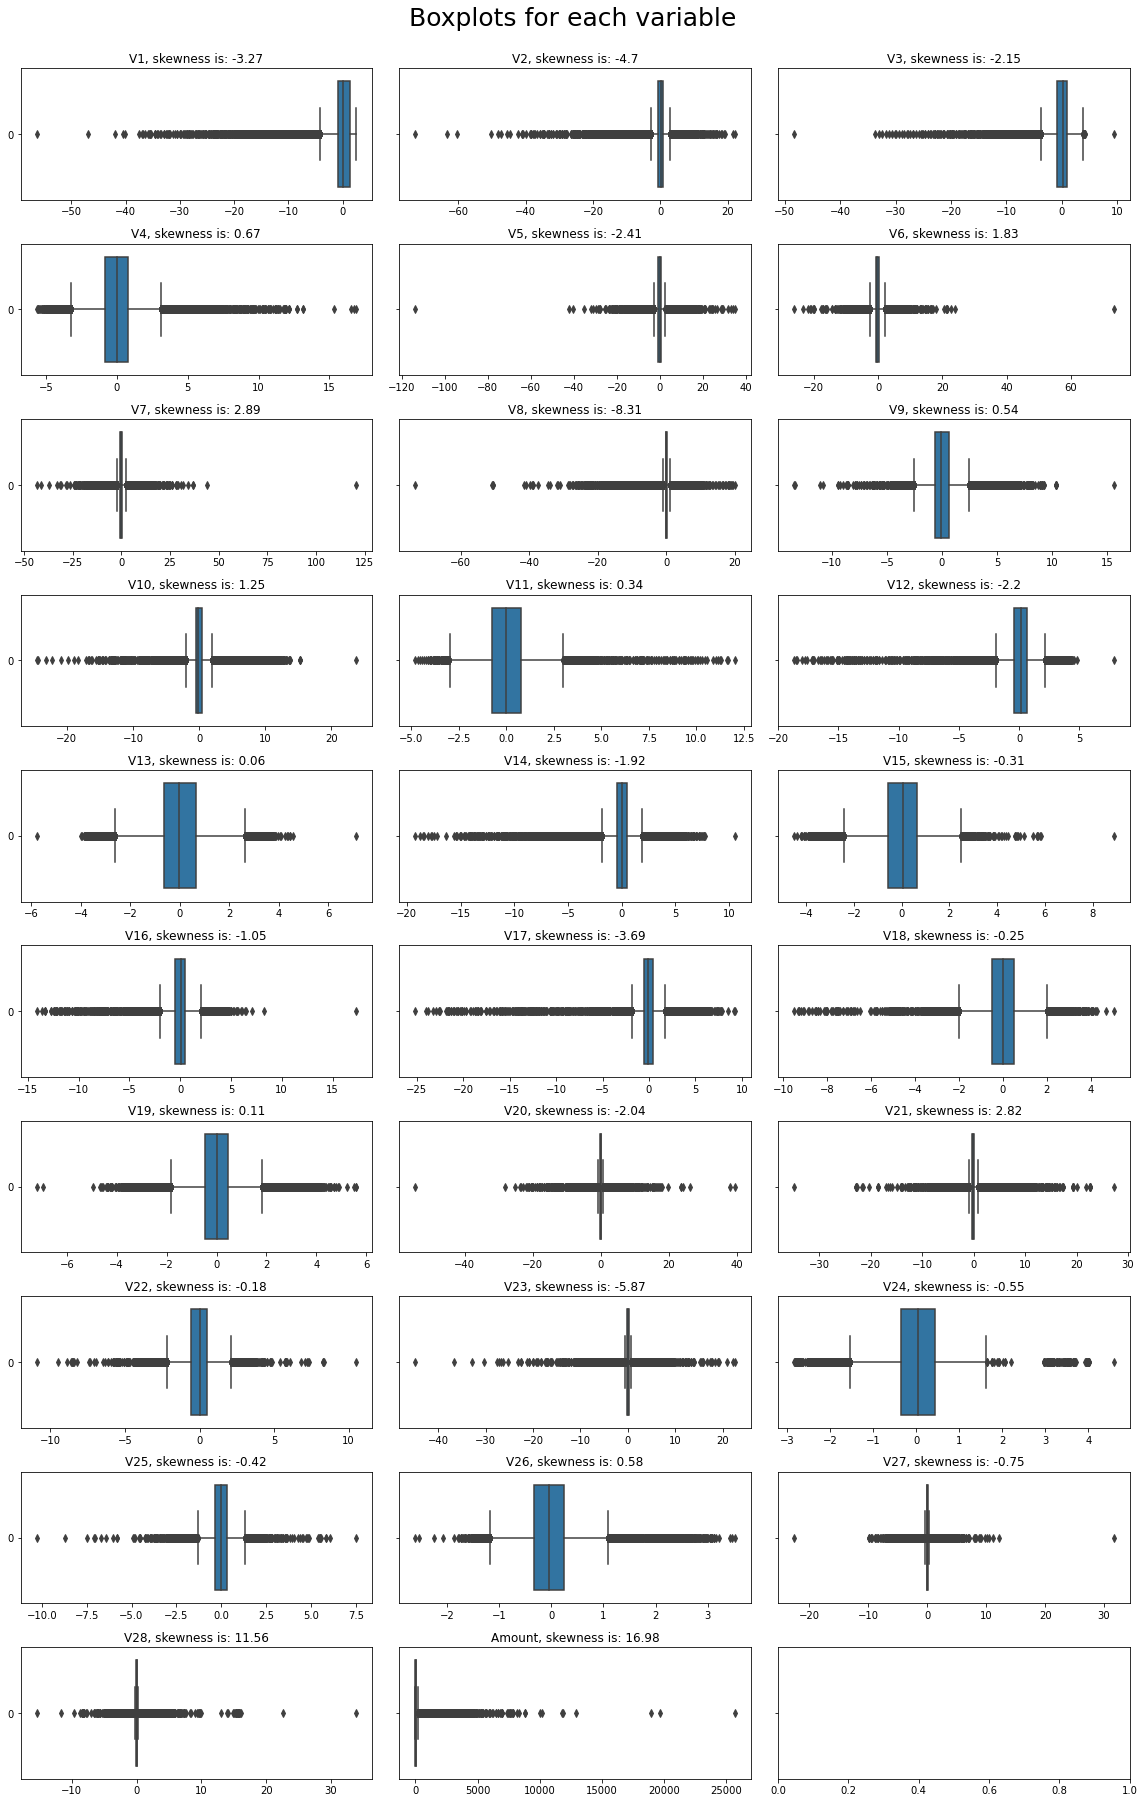

In [31]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, df in enumerate(columns_list):
        sns.boxplot(data=dataset[df], orient='h', ax=axs[i])
        axs[i].set_title(df + ', skewness is: '+str(round(dataset[df].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=num, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [32]:
numeric_columns = (list(num.loc[:, 'V1':'Amount']))

In [33]:
def IQR_method (df,n,features):
    
    outlier = []
    
    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outlier.extend(outlier_column)
        
    outlier = Counter(outlier)        
    multiple_outliers = list( k for k, v in outlier.items() if v > n )
    
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [34]:
Outliers_IQR = IQR_method(df,1,numeric_columns)

df_outlier = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31685


In [35]:
df_outlier.Class.value_counts()

0    202686
1        26
Name: Class, dtype: int64

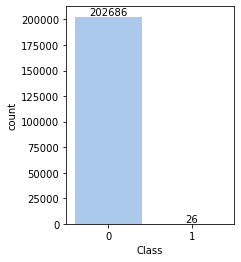

In [36]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_outlier,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

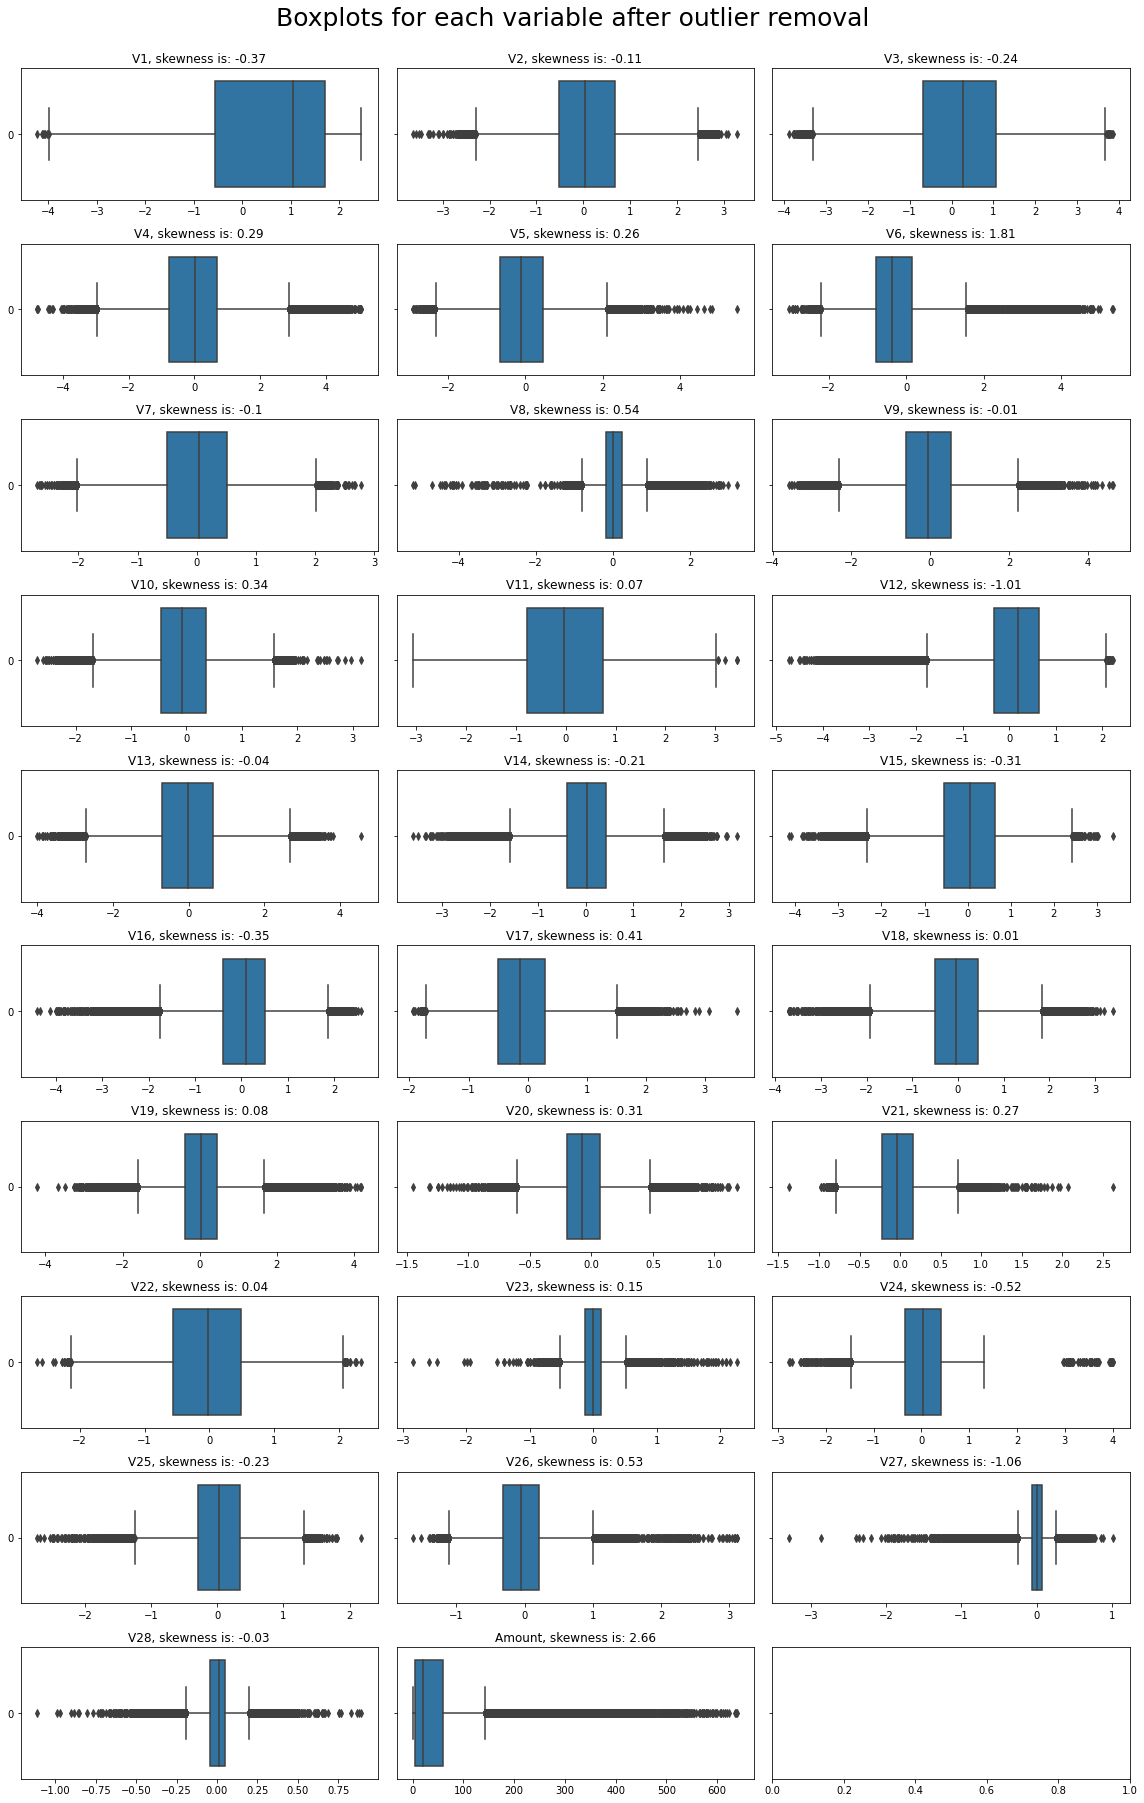

In [37]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df_outlier, columns_list=num, rows=10, cols=3, suptitle='Boxplots for each variable after outlier removal')
plt.tight_layout()

## Splitting dataset in Training and Testing data

In [38]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

In [39]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
118203,-1.424587,1.076404,1.685979,-0.841631,-0.598810,-0.727663,0.766091,-0.202509,0.120981,0.020114,...,0.151845,-0.155631,-0.299288,-0.149873,0.435667,0.131692,0.927079,-0.033722,0.201092,69.39
260729,2.239274,-0.407333,-2.190175,-1.004305,0.368514,-0.632340,-0.174740,-0.275769,-0.874464,0.430649,...,0.101513,-0.046212,-0.062383,0.011729,-1.163733,0.137505,-0.234818,-0.023925,-0.054453,15.00
284668,1.786326,-0.389739,-0.817163,1.247810,-0.184970,-0.132745,-0.165448,0.033821,0.558074,0.350017,...,-0.118749,0.123585,0.286509,0.050191,-0.433841,-0.054956,-0.657182,0.014365,-0.038419,91.20
85464,-1.093040,0.346896,1.657115,0.396435,-0.683734,-0.441274,-0.135810,0.520362,0.068548,-0.915455,...,0.047284,0.268483,0.614402,-0.059844,0.447666,-0.144317,0.435483,-0.017621,0.018871,59.90
126203,-0.903155,0.568200,1.205731,0.004331,0.450145,-0.377371,0.366544,0.228268,-0.437136,-0.231358,...,-0.036983,-0.206929,-0.493182,0.390623,-0.063572,-0.207800,0.090411,0.172782,0.037575,1.79


In [40]:
Y_train.head()

118203    0
260729    0
284668    0
85464     0
126203    0
Name: Class, dtype: int64

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest without Oversampling

In [42]:
kfold = StratifiedKFold(n_splits=5, shuffle=False)
rfore = RandomForestClassifier(n_estimators=100, random_state=13)

In [43]:
score = cross_val_score(rfore, X_train, Y_train, cv=kfold, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.74025974 0.75324675 0.76923077 0.79487179 0.75641026]
Average Cross Validation Recall score: 0.7628038628038627


In [53]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf1 = GridSearchCV(rfore, param_grid=params, cv=kfold, scoring='recall').fit(X_train, Y_train)

In [54]:
print('Best parameters:', grid_rf1.best_params_)
print('Best score:', grid_rf1.best_score_)

Best parameters: {'max_depth': 12, 'n_estimators': 200, 'random_state': 13}
Best score: 0.7705627705627706


In [55]:
y_pred = grid_rf1.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

rfore_Recall = recall_score(Y_test, y_pred)
rfore_Precision = precision_score(Y_test, y_pred)
rfore_f1 = f1_score(Y_test, y_pred)
rfore_accuracy = accuracy_score(Y_test, y_pred)

In [56]:
print(cm)

[[56655     6]
 [   18    67]]


In [57]:
ndf = [(rfore_Recall, rfore_Precision, rfore_f1, rfore_accuracy)]
rfore_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rfore_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rfore_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.788235,0.917808,0.848101,0.999577


## Random forest with Oversampling (SMOTE)

In [58]:
pip install -U imbalanced-learn

In [6]:
from imblearn.over_sampling import SMOTE

In [60]:
from imblearn.pipeline import Pipeline, make_pipeline

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))
cross_val_score(imba_pipeline, X_train, Y_train, scoring='recall', cv=kfold)

array([0.80519481, 0.87012987, 0.80769231, 0.82051282, 0.78205128])

In [62]:
## Tuning Parameter using Grid Search CV
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kfold, scoring='recall',return_train_score=True)
grid_imba.fit(X_train, Y_train);

In [63]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': 4,
 'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__random_state': 13}

In [64]:
grid_imba.best_score_

0.8712287712287712

In [65]:
y_test_predict = grid_imba.predict(X_test)
recall_score(Y_test, y_test_predict)

0.8705882352941177

In [66]:
cm = confusion_matrix(Y_test, y_pred)

over_rfore_Recall = recall_score(Y_test, y_pred)
over_rfore_Precision = precision_score(Y_test, y_pred)
over_rfore_f1 = f1_score(Y_test, y_pred)
over_rfore_accuracy = accuracy_score(Y_test, y_pred)

print(cm)

[[56655     6]
 [   18    67]]


In [67]:
ndf = [(over_rfore_Recall, over_rfore_Precision, over_rfore_f1, over_rfore_accuracy)]

over_rfore_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rfore_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rfore_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.788235,0.917808,0.848101,0.999577


## Logistic Regression with Oversampling ( SMOTE)

In [ ]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), LogisticRegression())
cross_val_score(imba_pipeline, X_train, Y_train, scoring='recall', cv=kf)

In [ ]:
new_params = {'Logistic Regression' + key: param_grid2[key] for key in param_grid2}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kfold, scoring='recall',return_train_score=True)
grid_imba.fit(X_train, Y_train);

In [ ]:
grid_imba.best_params_

In [ ]:
grid_imba.best_score_

In [ ]:
y_test_predict = grid_imba.predict(X_test)
recall_score(Y_test, y_test_predict)

In [ ]:
con_mat = confusion_matrix(Y_test, y_pred)

lg_Recall = recall_score(Y_test, y_pred)
lg_Precision = precision_score(Y_test, y_pred)
lg_f1 = f1_score(Y_test, y_pred)
lg_accuracy = accuracy_score(Y_test, y_pred)

print(con_mat)

In [ ]:
ndf = [(lg_Recall, lg_Precision, lg_f1, lg_accuracy)]

lg_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
lg_score.insert(0, 'Logistic Regression', 'Random Oversampling')
lg_score